In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

I need to access tables of statistics from www.basketballreference.com. The two kinds of tables I will scrape using pd.read_html are:
1. Per 36 stats, or totals per 36 minutes played.
2. Advanced stats, related to "efficiency".

I scrape for seasons 2007 - 2014 to get the first 4 seasons of data for players.
I scrape for seasons 2011 - 2019 to try to get the last.
With this data I will track 5 rookie season cohorts beginning with 2006-2007, for 9 years each.

In [2]:
url1 = 'https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_minute&per_minute_base=36&per_poss_base=100&season_start=1&season_end=4&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=2007&year_max=2014&birth_country_is=Y&as_comp=gt&as_val=0&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&c5val=0&order_by=ws'
tables = pd.read_html(url1)
df = tables[0]
df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Per 36 Minutes,Shooting,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Unnamed: 32_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Chris Paul,2008-09,23,NOH,NBA,18.3,78,78,3002,...,0.1,2.8,2.5,21.4,.503,.525,.364,.528,.868,.599
1,2,Chris Paul,2007-08,22,NOH,NBA,17.8,80,80,3006,...,0.0,2.4,2.2,20.2,.488,.516,.369,.524,.851,.576
2,3,Kevin Durant,2009-10,21,OKC,NBA,16.1,82,82,3239,...,0.9,3.0,1.9,27.5,.476,.506,.365,.514,.900,.607
3,4,LeBron James,2006-07,22,CLE,NBA,13.7,78,78,3190,...,0.6,2.8,1.9,24.1,.476,.513,.319,.507,.698,.552
4,5,Brandon Roy,2008-09,24,POR,NBA,13.5,78,78,2903,...,0.3,1.9,1.6,21.9,.480,.501,.377,.512,.824,.573


In [3]:
extensions = []
for i in range(1, 18):
    extensions.append(100 * i)
for extension in extensions:
    table = pd.read_html(url1 + "&order_by_asc=&offset=" + str(extension))
    df = df.append(table[0])
df.tail()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Per 36 Minutes,Shooting,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Unnamed: 32_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
48,1747,Donté Greene,2008-09,20,SAC,NBA,-1.1,55,4,725,...,0.7,1.8,3.4,10.4,.326,.375,.260,.381,.853,.416
49,1748,Austin Rivers,2012-13,20,NOH,NBA,-1.1,61,26,1418,...,0.2,1.9,3.1,9.6,.372,.385,.326,.408,.546,.431
50,1749,Jonny Flynn,2010-11,21,MIN,NBA,-1.3,53,8,983,...,0.1,4.1,2.1,10.2,.365,.393,.310,.417,.762,.444
51,1750,Cory Higgins,2011-12,22,CHA,NBA,-1.3,38,0,423,...,0.5,3.3,3.4,12.8,.325,.343,.200,.338,.700,.402
52,1751,Adam Morrison,2006-07,22,CHA,NBA,-1.5,78,23,2326,...,0.1,2.0,2.8,14.2,.376,.391,.337,.422,.710,.450


In [4]:
df.columns = df.columns.droplevel(level = 0)
df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Chris Paul,2008-09,23,NOH,NBA,18.3,78,78,3002,...,0.1,2.8,2.5,21.4,.503,.525,.364,.528,.868,.599
1,2,Chris Paul,2007-08,22,NOH,NBA,17.8,80,80,3006,...,0.0,2.4,2.2,20.2,.488,.516,.369,.524,.851,.576
2,3,Kevin Durant,2009-10,21,OKC,NBA,16.1,82,82,3239,...,0.9,3.0,1.9,27.5,.476,.506,.365,.514,.900,.607
3,4,LeBron James,2006-07,22,CLE,NBA,13.7,78,78,3190,...,0.6,2.8,1.9,24.1,.476,.513,.319,.507,.698,.552
4,5,Brandon Roy,2008-09,24,POR,NBA,13.5,78,78,2903,...,0.3,1.9,1.6,21.9,.480,.501,.377,.512,.824,.573


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 52
Data columns (total 33 columns):
Rk        1821 non-null object
Player    1821 non-null object
Season    1821 non-null object
Age       1821 non-null object
Tm        1821 non-null object
Lg        1821 non-null object
WS        1821 non-null object
G         1821 non-null object
GS        1821 non-null object
MP        1821 non-null object
FG        1819 non-null object
FGA       1819 non-null object
2P        1819 non-null object
2PA       1819 non-null object
3P        1819 non-null object
3PA       1819 non-null object
FT        1819 non-null object
FTA       1819 non-null object
ORB       1819 non-null object
DRB       1819 non-null object
TRB       1819 non-null object
AST       1819 non-null object
STL       1819 non-null object
BLK       1819 non-null object
TOV       1819 non-null object
PF        1819 non-null object
PTS       1819 non-null object
FG%       1816 non-null object
2P%       1813 non-null obj

In [6]:
df.tail()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
48,1747,Donté Greene,2008-09,20,SAC,NBA,-1.1,55,4,725,...,0.7,1.8,3.4,10.4,.326,.375,.260,.381,.853,.416
49,1748,Austin Rivers,2012-13,20,NOH,NBA,-1.1,61,26,1418,...,0.2,1.9,3.1,9.6,.372,.385,.326,.408,.546,.431
50,1749,Jonny Flynn,2010-11,21,MIN,NBA,-1.3,53,8,983,...,0.1,4.1,2.1,10.2,.365,.393,.310,.417,.762,.444
51,1750,Cory Higgins,2011-12,22,CHA,NBA,-1.3,38,0,423,...,0.5,3.3,3.4,12.8,.325,.343,.200,.338,.700,.402
52,1751,Adam Morrison,2006-07,22,CHA,NBA,-1.5,78,23,2326,...,0.1,2.0,2.8,14.2,.376,.391,.337,.422,.710,.450


In [7]:
url_adv = "https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&per_minute_base=36&per_poss_base=100&type=advanced&season_start=1&season_end=4&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=2007&year_max=2014&birth_country_is=Y&as_comp=gt&as_val=0&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&c5val=0&order_by=ws"
tables_adv = pd.read_html(url_adv)
adv_df = tables_adv[0]
adv_df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Advanced,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Chris Paul,2008-09,23,NOH,NBA,18.3,78,78,3002,...,27.5,124,103,13.3,5.0,.292,9.1,2.1,11.2,10.0
1,2,Chris Paul,2007-08,22,NOH,NBA,17.8,80,80,3006,...,25.7,125,103,13.2,4.6,.284,8.3,0.9,9.2,8.5
2,3,Kevin Durant,2009-10,21,OKC,NBA,16.1,82,82,3239,...,32.0,118,104,11.1,5.0,.238,4.9,0.2,5.1,5.8
3,4,LeBron James,2006-07,22,CLE,NBA,13.7,78,78,3190,...,31.0,112,100,8.0,5.7,.206,5.4,2.0,7.4,7.6
4,5,Brandon Roy,2008-09,24,POR,NBA,13.5,78,78,2903,...,27.4,123,109,10.9,2.6,.223,5.9,-0.2,5.8,5.7


In [8]:
extensions = []
for i in range(1, 18):
    extensions.append(100 * i)
for extension in extensions:
    table = pd.read_html(url_adv + "&order_by_asc=&offset=" + str(extension))
    adv_df = adv_df.append(table[0])
adv_df.tail()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Advanced,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
48,1747,Donté Greene,2008-09,20,SAC,NBA,-1.1,55,4,725,...,17.8,84,116,-1.2,0.1,-.074,-5.1,-2.7,-7.8,-1.1
49,1748,Austin Rivers,2012-13,20,NOH,NBA,-1.1,61,26,1418,...,16.8,89,114,-1.2,0.1,-.038,-3.6,-2.0,-5.6,-1.3
50,1749,Jonny Flynn,2010-11,21,MIN,NBA,-1.3,53,8,983,...,18.5,85,114,-1.6,0.2,-.064,-4.4,-2.8,-7.2,-1.3
51,1750,Cory Higgins,2011-12,22,CHA,NBA,-1.3,38,0,423,...,24.6,77,114,-1.2,-0.1,-.150,-7.4,-4.1,-11.6,-1.0
52,1751,Adam Morrison,2006-07,22,CHA,NBA,-1.5,78,23,2326,...,22.4,91,112,-2.2,0.8,-.030,-3.0,-2.5,-5.5,-2.0


In [9]:
adv_df.columns = adv_df.columns.droplevel(level = 0)
adv_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Chris Paul,2008-09,23,NOH,NBA,18.3,78,78,3002,...,27.5,124,103,13.3,5.0,.292,9.1,2.1,11.2,10.0
1,2,Chris Paul,2007-08,22,NOH,NBA,17.8,80,80,3006,...,25.7,125,103,13.2,4.6,.284,8.3,0.9,9.2,8.5
2,3,Kevin Durant,2009-10,21,OKC,NBA,16.1,82,82,3239,...,32.0,118,104,11.1,5.0,.238,4.9,0.2,5.1,5.8
3,4,LeBron James,2006-07,22,CLE,NBA,13.7,78,78,3190,...,31.0,112,100,8.0,5.7,.206,5.4,2.0,7.4,7.6
4,5,Brandon Roy,2008-09,24,POR,NBA,13.5,78,78,2903,...,27.4,123,109,10.9,2.6,.223,5.9,-0.2,5.8,5.7


In [10]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 52
Data columns (total 30 columns):
Rk        1821 non-null object
Player    1821 non-null object
Season    1821 non-null object
Age       1821 non-null object
Tm        1821 non-null object
Lg        1821 non-null object
WS        1821 non-null object
G         1821 non-null object
GS        1821 non-null object
MP        1821 non-null object
PER       1819 non-null object
3PAr      1816 non-null object
FTr       1816 non-null object
ORB%      1819 non-null object
DRB%      1819 non-null object
TRB%      1819 non-null object
AST%      1819 non-null object
STL%      1819 non-null object
BLK%      1819 non-null object
TOV%      1816 non-null object
USG%      1819 non-null object
ORtg      1816 non-null object
DRtg      1819 non-null object
OWS       1821 non-null object
DWS       1821 non-null object
WS/48     1819 non-null object
OBPM      1821 non-null object
DBPM      1821 non-null object
BPM       1821 non-null obj

In [11]:
url_y = "https://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=totals&per_minute_base=36&per_poss_base=100&season_start=5&season_end=9&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=2011&year_max=2019&birth_country_is=Y&as_comp=gt&as_val=0&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&c5val=0&order_by=ws"
tables_y = pd.read_html(url_y)
y_df = tables_y[0]
y_df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Shooting,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Unnamed: 32_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2,81,81,3122,...,59,285,174,2593,.503,.549,.391,.560,.873,.635
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9,81,81,3119,...,105,280,143,2280,.510,.539,.416,.559,.905,.647
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9,79,79,2700,...,15,262,161,2375,.504,.566,.454,.630,.908,.669
3,4,James Harden,2014-15,25,HOU,NBA,16.4,81,81,2981,...,60,321,208,2217,.440,.480,.375,.511,.868,.605
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7,80,80,2613,...,16,249,158,1900,.487,.528,.443,.594,.914,.638


In [12]:

extensions = []
for i in range(1, 14):
    extensions.append(100 * i)
for extension in extensions:
    table = pd.read_html(url_y + "&order_by_asc=&offset=" + str(extension))
    y_df = y_df.append(table[0])
y_df.tail()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Totals,Shooting,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0,Unnamed: 30_level_0,Unnamed: 31_level_0,Unnamed: 32_level_0
,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
55,1354,Tyrus Thomas,2011-12,25,CHA,NBA,-0.6,54,30,1013,...,60,53,144,304,.367,.367,.333,.369,.759,.418
56,1355,John Lucas III,2013-14,31,UTA,NBA,-0.7,42,6,591,...,0,22,41,159,.326,.349,.298,.392,.625,.403
57,1356,Ronnie Price,2010-11,27,UTA,NBA,-0.7,59,0,717,...,5,55,106,197,.352,.383,.290,.400,.744,.434
58,1357,Lance Stephenson,2014-15,24,CHO,NBA,-0.9,61,25,1573,...,8,128,134,501,.376,.425,.171,.393,.627,.419
59,1358,Michael Beasley,2012-13,24,PHO,NBA,-1.5,75,20,1554,...,34,144,107,759,.405,.426,.313,.434,.746,.462


In [13]:
y_df.columns = y_df.columns.droplevel(level = 0)
y_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2,81,81,3122,...,59,285,174,2593,.503,.549,.391,.560,.873,.635
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9,81,81,3119,...,105,280,143,2280,.510,.539,.416,.559,.905,.647
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9,79,79,2700,...,15,262,161,2375,.504,.566,.454,.630,.908,.669
3,4,James Harden,2014-15,25,HOU,NBA,16.4,81,81,2981,...,60,321,208,2217,.440,.480,.375,.511,.868,.605
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7,80,80,2613,...,16,249,158,1900,.487,.528,.443,.594,.914,.638


In [14]:
y_df.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%'],
      dtype='object')

For the "y" dataframe, Win Shares and age are the only variables of interest, so the rest are discarded.

In [15]:
y_df = y_df.drop(columns = y_df.columns[7:])
y_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9
3,4,James Harden,2014-15,25,HOU,NBA,16.4
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7


In [16]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 59
Data columns (total 7 columns):
Rk        1412 non-null object
Player    1412 non-null object
Season    1412 non-null object
Age       1412 non-null object
Tm        1412 non-null object
Lg        1412 non-null object
WS        1412 non-null object
dtypes: object(7)
memory usage: 88.2+ KB


1. Clean Data to remove extraneous seasons
2. Check to see that no player has more than 4 seasons of x's or 5 seasons of y's
3. Determine what to do about missing data


In [17]:
df['Player'].value_counts()

Player                 70
Marcus Williams         6
Chris Johnson           5
Wesley Matthews         4
Yi Jianlian             4
Greivis Vásquez         4
Eric Maynor             4
Alonzo Gee              4
Kevin Séraphin          4
James Johnson           4
Danilo Gallinari        4
Jordan Farmar           4
Craig Smith             4
DeMarre Carroll         4
Henry Walker            4
Garrett Temple          4
Ömer Aşık               4
Brandan Wright          4
Spencer Hawes           4
Marcin Gortat           4
Jerryd Bayless          4
Mario West              4
Jeff Green              4
Jamario Moon            4
Jrue Holiday            4
Tiago Splitter          4
Shannon Brown           4
Gerald Henderson        4
Ronnie Brewer           4
Mario Chalmers          4
                       ..
Juan Carlos Navarro     1
Donell Taylor           1
DeQuan Jones            1
Nate Wolters            1
Archie Goodwin          1
Gorgui Dieng            1
Vítor Faverani          1
Chris McCray

In [18]:
df[df['Player'] == "Marcus Williams"]

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
3,1304,Marcus Williams,2007-08,22,NJN,NBA,0.2,53,7,854,...,0.1,3.2,2.2,13.2,.379,.377,.380,.471,.787,.499
52,1551,Marcus Williams,2008-09,22,SAS,NBA,0.0,2,0,3,...,0.0,0.0,12.0,48.0,1.000,1.000,NaN,1.000,NaN,1.000
53,1552,Marcus Williams,2009-10,24,MEM,NBA,0.0,62,1,872,...,0.0,3.1,1.8,11.1,.384,.421,.296,.428,.673,.456
30,1630,Marcus Williams,2007-08,21,TOT,NBA,-0.1,11,0,36,...,1.0,0.0,3.0,10.0,.250,.250,NaN,.250,NaN,.250
31,1631,Marcus Williams,2008-09,23,GSW,NBA,-0.1,9,0,54,...,0.7,2.7,4.0,8.0,.235,.182,.333,.294,.333,.305
32,1632,Marcus Williams,2006-07,21,NJN,NBA,-0.1,79,2,1315,...,0.1,3.9,2.6,14.6,.395,.446,.282,.439,.847,.474


In [19]:
type(df['Player'].value_counts())

pandas.core.series.Series

In [20]:
df_player_counts = pd.DataFrame(df['Player'].value_counts())
df_player_counts.head()

,Player
Player,70
Marcus Williams,6
Chris Johnson,5
Wesley Matthews,4
Yi Jianlian,4


In [21]:
df_player_counts.reset_index()
df_player_counts.head()

,Player
Player,70
Marcus Williams,6
Chris Johnson,5
Wesley Matthews,4
Yi Jianlian,4


Restrict dataset to only those players that last the length of their rookie contracts.

In [22]:
four_row_players = list(df_player_counts[df_player_counts['Player'] == 4].index)
len(four_row_players)

196

In [23]:
four_row_players

['Wesley Matthews',
 'Yi Jianlian',
 'Greivis Vásquez',
 'Eric Maynor',
 'Alonzo Gee',
 'Kevin Séraphin',
 'James Johnson',
 'Danilo Gallinari',
 'Jordan Farmar',
 'Craig Smith',
 'DeMarre Carroll',
 'Henry Walker',
 'Garrett Temple',
 'Ömer Aşık',
 'Brandan Wright',
 'Spencer Hawes',
 'Marcin Gortat',
 'Jerryd Bayless',
 'Mario West',
 'Jeff Green',
 'Jamario Moon',
 'Jrue Holiday',
 'Tiago Splitter',
 'Shannon Brown',
 'Gerald Henderson',
 'Ronnie Brewer',
 'Mario Chalmers',
 'Eric Gordon',
 'Al Thornton',
 'Hasheem Thabeet',
 'Rodney Carney',
 'Shawne Williams',
 'Landry Fields',
 'Andrea Bargnani',
 'Cartier Martin',
 'Jeff Ayres',
 'Jason Smith',
 'Xavier Henry',
 'Rodney Stuckey',
 'Wayne Ellington',
 'Ed Davis',
 'Lou Amundson',
 'Patty Mills',
 'DeJuan Blair',
 'Brandon Roy',
 'Marco Belinelli',
 'Kevin Love',
 'Ian Mahinmi',
 'John Wall',
 'Darrell Arthur',
 'Anthony Randolph',
 'Al-Farouq Aminu',
 'Arron Afflalo',
 'A.J. Price',
 'Derrick Favors',
 'Kosta Koufos',
 'Aaron Bro

In [24]:
made_it = []
for player in four_row_players:
    if player in list(y_df['Player']):
        made_it.append(player)
len(made_it)

174

In [25]:
df = df[df['Player'].isin(made_it)]
len(df)

696

In [26]:
four_seasons_made_it = []
for player in made_it:
    if df[df['Player'] == player]['Season'].nunique() == 4:
        four_seasons_made_it.append(player)
df = df[df['Player'].isin(four_seasons_made_it)]
print(len(df), len(four_seasons_made_it))

696 174


In [27]:
df['Season'].value_counts()

2010-11    143
2009-10    136
2011-12    111
2008-09     97
2012-13     76
2007-08     62
2013-14     40
2006-07     31
Name: Season, dtype: int64

In [28]:
y_df = y_df[y_df['Player'].isin(four_seasons_made_it)]
len(y_df)


702

In [29]:
y_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9
3,4,James Harden,2014-15,25,HOU,NBA,16.4
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7


In [30]:

y_ws_dict = {}
def str_to_flt(string):
    return float(string)
y_df['WS'] = y_df['WS'].apply(lambda x: str_to_flt(x))

In 2011-2012 there was a labor stoppage, and as a result each team only played 66 games. Adjustments for this need to be made.

In [31]:
lockout_df = y_df[y_df['Season'] == '2011-12']
lockout_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS
32,32,Kevin Durant,2011-12,23,OKC,NBA,12.2
86,83,Joakim Noah,2011-12,26,CHI,NBA,9.0
27,127,Paul Millsap,2011-12,26,UTA,NBA,7.8
42,141,Marcin Gortat,2011-12,27,PHO,NBA,7.6
74,172,LaMarcus Aldridge,2011-12,26,POR,NBA,7.0


In [32]:
def lockout_adj(winshares):
    return round(winshares *(82/66), 1)
lockout_df['WS'] = lockout_df['WS'].apply(lambda x: lockout_adj(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
lockout_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS
32,32,Kevin Durant,2011-12,23,OKC,NBA,15.2
86,83,Joakim Noah,2011-12,26,CHI,NBA,11.2
27,127,Paul Millsap,2011-12,26,UTA,NBA,9.7
42,141,Marcin Gortat,2011-12,27,PHO,NBA,9.4
74,172,LaMarcus Aldridge,2011-12,26,POR,NBA,8.7


In [34]:
no_lockout_df = y_df[y_df['Season'] != '2011-12']
no_lockout_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9
3,4,James Harden,2014-15,25,HOU,NBA,16.4
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7


In [35]:
y_adj_for_lockout = no_lockout_df.append(lockout_df)
y_adj_for_lockout

,Rk,Player,Season,Age,Tm,Lg,WS
0,1,Kevin Durant,2013-14,25,OKC,NBA,19.2
1,2,Kevin Durant,2012-13,24,OKC,NBA,18.9
2,3,Stephen Curry,2015-16,27,GSW,NBA,17.9
3,4,James Harden,2014-15,25,HOU,NBA,16.4
4,5,Stephen Curry,2014-15,26,GSW,NBA,15.7
6,7,James Harden,2017-18,28,HOU,NBA,15.4
7,8,James Harden,2016-17,27,HOU,NBA,15.0
8,9,Kevin Durant,2015-16,27,OKC,NBA,14.5
13,14,Kevin Love,2013-14,25,MIN,NBA,14.3
14,15,Russell Westbrook,2015-16,27,OKC,NBA,14.0


In [36]:
def str_to_int(x):
    return int(x)
y_adj_for_lockout['Age'] = y_adj_for_lockout['Age'].apply(lambda x: str_to_int(x))

Here are some typical Win Share trajectories for "2nd contract" players.

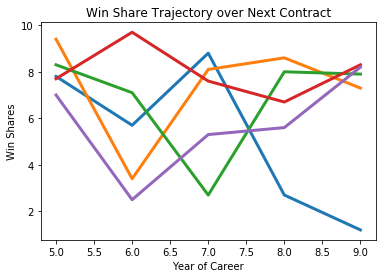

In [37]:
for player in list(y_adj_for_lockout['Player'].unique())[21:26]:
    df_i = y_adj_for_lockout[y_adj_for_lockout['Player'] == player].sort_values('Age', ascending = True)
    plt.plot(list(df_i['Age'] - df_i['Age'].min() + 5 ), list(df_i['WS']), linewidth = 3)
plt.ylabel("Win Shares")
plt.xlabel("Year of Career")

plt.title("Win Share Trajectory over Next Contract")
plt.savefig('vet_traj.png')

In [38]:
def yearfinder(row):
    current_age = row['Age']
    fifth_yr_age = y_adj_for_lockout[y_adj_for_lockout['Player'] == row['Player']]['Age'].min()
    return (current_age - fifth_yr_age + 5)
y_adj_for_lockout['Year'] = y_adj_for_lockout.apply(lambda x: yearfinder(x), axis = 1)


In [39]:
means = []
stds = []
for i in range(5,10):
    means.append(y_adj_for_lockout[y_adj_for_lockout['Year'] == i]['WS'].mean())
    stds.append(y_adj_for_lockout[y_adj_for_lockout['Year'] == i]['WS'].std())

In [40]:
years = [5,6,7,8,9]

In [41]:
means

[3.4816091954023,
 3.6846666666666676,
 3.6101449275362305,
 3.3193798449612397,
 3.7878504672897217]

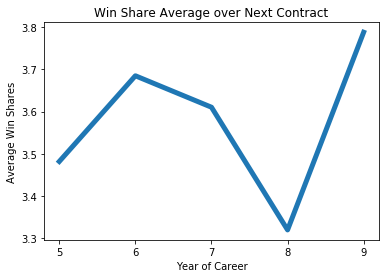

In [42]:
plt.plot(years, means, linewidth = 5)
plt.xlabel("Year of Career")
plt.ylabel("Average Win Shares")
plt.title("Win Share Average over Next Contract")
plt.xticks(ticks = [5,6,7,8,9])
plt.savefig('vet_avg.png')

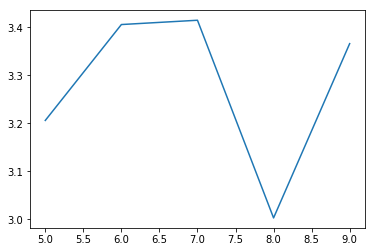

In [43]:
plt.plot(years, stds)

In [44]:
y_ws_dict = {}
for player in four_seasons_made_it:
    y_ws_dict[player] = no_lockout_df[no_lockout_df['Player'] == player]['WS'].sum() + lockout_df[lockout_df['Player'] == player]['WS'].sum()
y_ws_dict['Kevin Durant']

72.6

In [45]:
lockout_df[lockout_df['Player'] == "Kevin Durant"]['WS']

32    15.2
Name: WS, dtype: float64

In [46]:
peak_ws_dict = {}
for player in four_seasons_made_it:
    peak_ws_dict[player] = no_lockout_df[no_lockout_df['Player'] == player]['WS'].max()
for player in four_seasons_made_it:
    if lockout_df[lockout_df['Player'] == player]['WS'].max() > peak_ws_dict[player]:
        peak_ws_dict[player] = lockout_df[lockout_df['Player'] == player]['WS'].max()


In [47]:
peak_ws_dict

{'Wesley Matthews': 8.2,
 'Yi Jianlian': nan,
 'Greivis Vásquez': 2.8,
 'Eric Maynor': -0.4,
 'Alonzo Gee': 1.9,
 'Kevin Séraphin': 1.7,
 'James Johnson': 5.1,
 'Danilo Gallinari': 7.2,
 'Jordan Farmar': 2.2,
 'Craig Smith': 1.5,
 'DeMarre Carroll': 7.0,
 'Henry Walker': 0.5,
 'Garrett Temple': 2.7,
 'Ömer Aşık': 5.0,
 'Brandan Wright': 6.1,
 'Spencer Hawes': 4.5,
 'Marcin Gortat': 9.4,
 'Jerryd Bayless': 4.0,
 'Jeff Green': 5.2,
 'Jamario Moon': nan,
 'Jrue Holiday': 7.1,
 'Tiago Splitter': 4.0,
 'Shannon Brown': 3.1,
 'Gerald Henderson': 3.6,
 'Ronnie Brewer': 5.4,
 'Mario Chalmers': 5.2,
 'Eric Gordon': 3.8,
 'Hasheem Thabeet': 0.0,
 'Rodney Carney': 0.3,
 'Shawne Williams': 1.9,
 'Landry Fields': 0.3,
 'Andrea Bargnani': 2.7,
 'Cartier Martin': 1.3,
 'Jeff Ayres': 1.2,
 'Jason Smith': 2.3,
 'Xavier Henry': -0.1,
 'Rodney Stuckey': 5.6,
 'Wayne Ellington': 4.5,
 'Ed Davis': 6.7,
 'Lou Amundson': 1.2,
 'Patty Mills': 5.6,
 'DeJuan Blair': 3.4,
 'Brandon Roy': 2.1,
 'Marco Belinelli':

In [48]:
peak_ws_dict['Jamario Moon'] = -0.3
peak_ws_dict['Kyrylo Fesenko'] = 0.1
peak_ws_dict['Kelenna Azubuike'] = -0.1
peak_ws_dict['Yi Jianlian'] = 0.0

In [49]:
peak_ws_df = pd.DataFrame.from_dict(peak_ws_dict, orient = 'index',  dtype=None)
len(peak_ws_df)

174

In [50]:
peak_ws_df.head()

,0
Wesley Matthews,8.2
Yi Jianlian,0.0
Greivis Vásquez,2.8
Eric Maynor,-0.4
Alonzo Gee,1.9


In [51]:
peak_ws_df = peak_ws_df.reset_index()
peak_ws_df.head()

,index,0
0,Wesley Matthews,8.2
1,Yi Jianlian,0.0
2,Greivis Vásquez,2.8
3,Eric Maynor,-0.4
4,Alonzo Gee,1.9


In [52]:
peak_ws_df.columns = ['Player', 'Peak_WS']
peak_ws_df.head(1)

,Player,Peak_WS
0,Wesley Matthews,8.2


In [53]:
peak_ws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
Player     174 non-null object
Peak_WS    174 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [54]:
peak_ws_df.to_csv("peak_ws_v2.csv", sep = ",")

In [55]:
y_ws_dict['James Harden']

72.89999999999999

In [56]:
y_ws_dict['Stephen Curry']

68.69999999999999

In [57]:
y_ws_dict['Paul George']

37.1

In [58]:
adv_df = adv_df[adv_df['Player'].isin(four_seasons_made_it)]
len(adv_df)

696

In [59]:
adv_df = adv_df.drop(columns = ['Rk', 'Age', 'Tm', 'Lg',
       'WS', 'G', 'GS', 'MP'], axis = 1)

In [60]:
new_df = pd.merge(df, adv_df,  how='outer', left_on=['Player','Season'], right_on = ['Player','Season'])
new_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
0,3,Kevin Durant,2009-10,21,OKC,NBA,16.1,82,82,3239,...,32.0,118,104,11.1,5.0,.238,4.9,0.2,5.1,5.8
1,5,Brandon Roy,2008-09,24,POR,NBA,13.5,78,78,2903,...,27.4,123,109,10.9,2.6,.223,5.9,-0.2,5.8,5.7
2,6,Derrick Rose,2010-11,22,CHI,NBA,13.1,81,81,3026,...,32.2,113,103,8.3,4.8,.208,5.8,0.1,5.9,6.0
3,8,James Harden,2012-13,23,HOU,NBA,12.8,78,78,2985,...,29.0,116,106,9.8,3.0,.206,5.4,0.1,5.5,5.7
4,9,Blake Griffin,2013-14,24,LAC,NBA,12.2,80,80,2863,...,29.0,114,103,8.1,4.1,.205,3.0,1.6,4.6,4.8


In [61]:
len(new_df)

696

In [62]:
new_df['Age'] = new_df['Age'].apply(lambda x: str_to_flt(x))

In [63]:
def year_indexer(row):
    if row['Age'] == new_df[new_df['Player'] == row['Player']]['Age'].min():
        return 1
    else:
        return  (1 + row['Age'] - new_df[new_df['Player'] == row['Player']]['Age'].min())
new_df['Year'] = new_df.apply(lambda x: year_indexer(x), axis = 1)
new_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82,82,3239,...,118,104,11.1,5.0,.238,4.9,0.2,5.1,5.8,3.0
1,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78,78,2903,...,123,109,10.9,2.6,.223,5.9,-0.2,5.8,5.7,3.0
2,6,Derrick Rose,2010-11,22.0,CHI,NBA,13.1,81,81,3026,...,113,103,8.3,4.8,.208,5.8,0.1,5.9,6.0,3.0
3,8,James Harden,2012-13,23.0,HOU,NBA,12.8,78,78,2985,...,116,106,9.8,3.0,.206,5.4,0.1,5.5,5.7,4.0
4,9,Blake Griffin,2013-14,24.0,LAC,NBA,12.2,80,80,2863,...,114,103,8.1,4.1,.205,3.0,1.6,4.6,4.8,4.0


In [64]:
def flt_to_int(flt):
    return(int(flt))
new_df['Year'] = new_df['Year'].apply(lambda x: flt_to_int(x))

In [65]:
new_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82,82,3239,...,118,104,11.1,5.0,.238,4.9,0.2,5.1,5.8,3
1,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78,78,2903,...,123,109,10.9,2.6,.223,5.9,-0.2,5.8,5.7,3
2,6,Derrick Rose,2010-11,22.0,CHI,NBA,13.1,81,81,3026,...,113,103,8.3,4.8,.208,5.8,0.1,5.9,6.0,3
3,8,James Harden,2012-13,23.0,HOU,NBA,12.8,78,78,2985,...,116,106,9.8,3.0,.206,5.4,0.1,5.5,5.7,4
4,9,Blake Griffin,2013-14,24.0,LAC,NBA,12.2,80,80,2863,...,114,103,8.1,4.1,.205,3.0,1.6,4.6,4.8,4


In [66]:
y_ws_dict['Kyle Lowry']

37.5

In [67]:
new_df[new_df['Player'] == "Kyle Lowry"]

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP,Year
173,289,Kyle Lowry,2009-10,23.0,HOU,NBA,4.3,68,0,1651,...,113,109,2.9,1.4,.126,1.3,0.0,1.3,1.4,4
229,382,Kyle Lowry,2008-09,22.0,TOT,NBA,3.6,77,21,1679,...,109,108,1.8,1.8,.103,-0.5,-0.1,-0.7,0.6,3
250,410,Kyle Lowry,2007-08,21.0,MEM,NBA,3.4,82,9,2089,...,108,111,2.1,1.3,.078,-0.2,-0.4,-0.6,0.8,2
587,1101,Kyle Lowry,2006-07,20.0,MEM,NBA,0.5,10,0,175,...,118,108,0.4,0.2,.148,2.3,1.0,3.3,0.2,1


Here are histograms of Win Share distributions over the span of their second contract, as well as by year for their first.

(array([66., 37., 30., 16., 10., 10.,  0.,  2.,  0.,  3.]),
 array([-0.4 ,  6.93, 14.26, 21.59, 28.92, 36.25, 43.58, 50.91, 58.24,
        65.57, 72.9 ]),
 <a list of 10 Patch objects>)

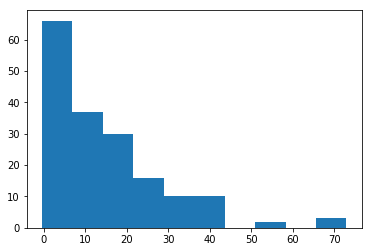

In [68]:
players = []
winshares = []
for key, value in y_ws_dict.items():
    players.append(key)
    winshares.append(value)
plt.hist(winshares)

In [69]:
max(winshares), min(winshares)

(72.89999999999999, -0.4)

In [70]:
winshares_adj = []
for winshare in winshares:
    if winshare > 0:
        winshares_adj.append(winshare)
    else:
        winshares_adj.append(0.1)
winshares_adj = np.array(winshares_adj)

In [71]:
log_winshares = np.log(winshares_adj)


(array([11.,  5.,  7.,  6., 16., 13., 21., 49., 35., 11.]),
 array([-2.30258509, -1.64341772, -0.98425035, -0.32508297,  0.3340844 ,
         0.99325177,  1.65241915,  2.31158652,  2.97075389,  3.62992127,
         4.28908864]),
 <a list of 10 Patch objects>)

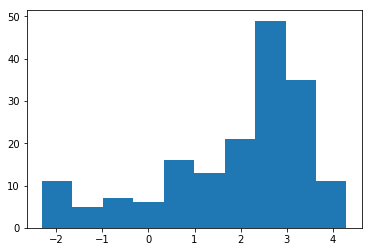

In [72]:
plt.hist(log_winshares)

In [73]:
log_winshares_df = pd.DataFrame(list(zip(players, winshares, list(log_winshares))), columns = ['Player', 'winshares', 'log_winshares'])
log_winshares_df.head()
log_winshares_df = log_winshares_df.sort_values(by = 'winshares', ascending = False)
log_winshares_df.head()

,Player,winshares,log_winshares
120,James Harden,72.9,4.289089
113,Kevin Durant,72.6,4.284965
88,Stephen Curry,68.7,4.229749
110,Russell Westbrook,54.5,3.998201
89,DeAndre Jordan,53.4,3.977811


In [74]:
log_winshares_df.tail()

,Player,winshares,log_winshares
35,Xavier Henry,-0.1,-2.302585
150,Chris Quinn,-0.1,-2.302585
135,James Anderson,-0.3,-2.302585
3,Eric Maynor,-0.4,-2.302585
19,Jamario Moon,-0.4,-2.302585


In [75]:
log_winshares_df = log_winshares_df.reset_index()
log_winshares_df.head()

,index,Player,winshares,log_winshares
0,120,James Harden,72.9,4.289089
1,113,Kevin Durant,72.6,4.284965
2,88,Stephen Curry,68.7,4.229749
3,110,Russell Westbrook,54.5,3.998201
4,89,DeAndre Jordan,53.4,3.977811


In [76]:
master_df = pd.merge(new_df, log_winshares_df,  how='outer', left_on='Player', right_on = 'Player')
master_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,DWS,WS/48,OBPM,DBPM,BPM,VORP,Year,index,winshares,log_winshares
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82,82,3239,...,5.0,.238,4.9,0.2,5.1,5.8,3,113,72.6,4.284965
1,10,Kevin Durant,2010-11,22.0,OKC,NBA,12.0,78,78,3038,...,3.3,.189,3.7,-0.8,2.9,3.7,4,113,72.6,4.284965
2,58,Kevin Durant,2008-09,20.0,OKC,NBA,7.9,74,74,2885,...,2.7,.132,2.2,-0.5,1.8,2.8,2,113,72.6,4.284965
3,591,Kevin Durant,2007-08,19.0,SEA,NBA,2.3,80,80,2768,...,1.9,.040,-0.6,-0.7,-1.4,0.4,1,113,72.6,4.284965
4,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78,78,2903,...,2.6,.223,5.9,-0.2,5.8,5.7,3,42,2.1,0.741937


In [77]:
master_df.to_csv("nba_master.csv", sep=',')

In [78]:
master_df.columns

Index(['Rk', 'Player', 'Season', 'Age', 'Tm', 'Lg', 'WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Year', 'index', 'winshares',
       'log_winshares'],
      dtype='object')

In [79]:
numerical = ['WS', 'G', 'GS', 'MP',
       'FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%',
       'FT%', 'TS%', 'PER', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'ORtg', 'DRtg', 'OWS', 'DWS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'Year', 'index', 'winshares',
       'log_winshares']
for column in numerical:
    master_df[column] = master_df[column].apply(lambda x: str_to_flt(x))


In [80]:
master_df.corr()

,Age,WS,G,GS,MP,FG,FGA,2P,2PA,3P,...,DWS,WS/48,OBPM,DBPM,BPM,VORP,Year,index,winshares,log_winshares
Age,1.000000,0.056689,-0.022460,-0.077779,-0.046652,-0.124936,-0.178386,-0.128212,-0.190947,0.035676,...,-0.011843,0.162308,0.074694,0.056091,0.097887,0.020264,0.590551,0.012714,-0.253313,-0.192722
WS,0.056689,1.000000,0.566100,0.669399,0.773279,0.434882,0.258529,0.352913,0.247119,0.038787,...,0.790289,0.666504,0.687397,0.264345,0.754974,0.906015,0.215146,0.140637,0.516905,0.419658
G,-0.022460,0.566100,1.000000,0.531387,0.797578,0.153281,0.084115,0.112351,0.077462,0.032686,...,0.625463,0.183690,0.326759,0.171363,0.385969,0.373122,0.054923,0.059076,0.289503,0.313568
GS,-0.077779,0.669399,0.531387,1.000000,0.849094,0.379687,0.315558,0.325908,0.305779,0.004457,...,0.638653,0.212584,0.445175,0.171288,0.489371,0.630034,0.127477,0.073407,0.378853,0.355670
MP,-0.046652,0.773279,0.797578,0.849094,1.000000,0.402181,0.352552,0.281730,0.262902,0.111875,...,0.722834,0.260579,0.556796,0.116829,0.552930,0.649183,0.146576,0.109563,0.437945,0.418013
FG,-0.124936,0.434882,0.153281,0.379687,0.402181,1.000000,0.872231,0.808845,0.769545,0.093752,...,0.255749,0.350984,0.512291,-0.220035,0.310992,0.347853,0.104570,0.104562,0.273701,0.263986
FGA,-0.178386,0.258529,0.084115,0.315558,0.352552,0.872231,1.000000,0.560609,0.669200,0.328125,...,0.137458,0.017693,0.402244,-0.426485,0.091433,0.216085,0.072142,0.105490,0.196935,0.197203
2P,-0.128212,0.352913,0.112351,0.325908,0.281730,0.808845,0.560609,1.000000,0.940171,-0.508935,...,0.290190,0.329796,0.163107,0.112991,0.210094,0.253271,0.037488,0.071804,0.223954,0.221334
2PA,-0.190947,0.247119,0.077462,0.305779,0.262902,0.769545,0.669200,0.940171,1.000000,-0.465574,...,0.239324,0.112327,0.041955,0.010106,0.043570,0.164053,-0.006581,0.076207,0.190495,0.194913
3P,0.035676,0.038787,0.032686,0.004457,0.111875,0.093752,0.328125,-0.508935,-0.465574,1.000000,...,-0.119436,-0.046735,0.474126,-0.514683,0.099021,0.080609,0.090216,0.030900,0.021777,0.011348


In [81]:
print(master_df[master_df['Year'] == 1]['WS'].mean(), master_df[master_df['Year'] == 1]['WS'].std())


1.8954022988505732 1.8150563644157844


(array([42., 48., 36., 13., 18., 11.,  5.,  0.,  0.,  1.]),
 array([-0.6 ,  0.44,  1.48,  2.52,  3.56,  4.6 ,  5.64,  6.68,  7.72,
         8.76,  9.8 ]),
 <a list of 10 Patch objects>)

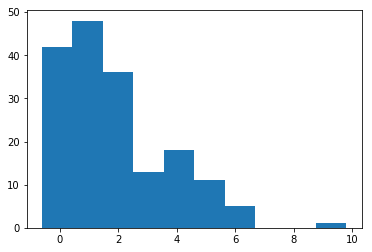

In [82]:
plt.hist(master_df[master_df['Year'] == 1]['WS'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


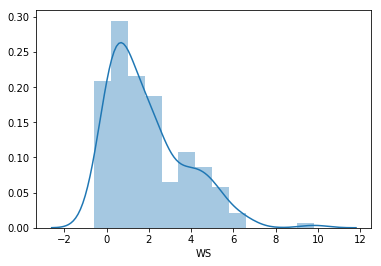

In [83]:
sns.distplot(master_df[master_df['Year'] == 1]['WS'])
plt.savefig('yr1_hist.png')

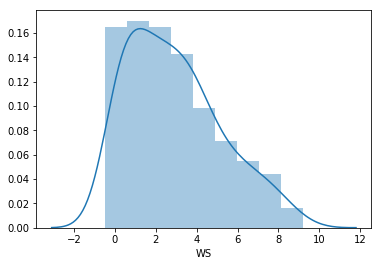

In [84]:
sns.distplot(master_df[master_df['Year'] == 2]['WS'])
plt.savefig('yr2_hist.png')

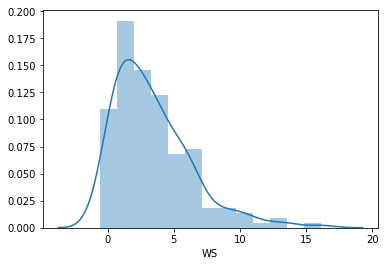

In [85]:
sns.distplot(master_df[master_df['Year'] == 3]['WS'])
plt.savefig('yr3_hist.png')

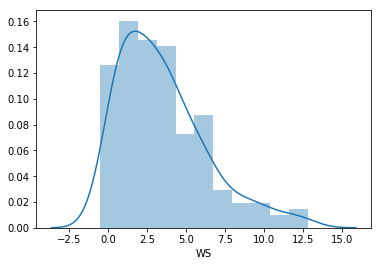

In [86]:
sns.distplot(master_df[master_df['Year'] == 4]['WS'])
plt.savefig('yr4_hist.png')

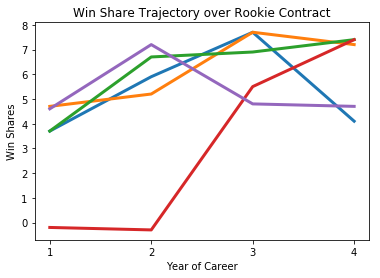

In [87]:

for player in list(master_df['Player'].unique())[21:26]:
    df = master_df[master_df['Player'] == player].sort_values('Year', ascending = True)
    plt.plot(list(df['Year']), list(df['WS']), linewidth = 3)
plt.ylabel("Win Shares")
plt.xlabel("Year of Career")
plt.xticks(ticks=[1.0, 2.0, 3.0, 4.0])
plt.title("Win Share Trajectory over Rookie Contract")
plt.savefig('rook_traj.png')

In [88]:
print(master_df[master_df['Year'] == 2]['WS'].mean(), master_df[master_df['Year'] == 2]['WS'].std())

2.9017751479289955 2.2815114396251914


In [141]:
rook_means = []
rook_stds = []
years = [1,2,3,4]
for i in range(1,5):
    rook_means.append(master_df[master_df['Year'] == i]['WS'].mean())
    rook_stds.append(master_df[master_df['Year'] == i]['WS'].std())

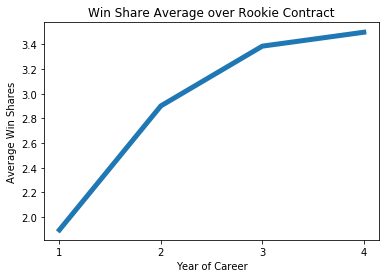

In [90]:
plt.plot(years, rook_means, linewidth = 5)
plt.xlabel("Year of Career")
plt.ylabel("Average Win Shares")
plt.title("Win Share Average over Rookie Contract")
plt.xticks(ticks = [1,2,3,4])
plt.savefig('rook_avg.png')

In [142]:
nine_means = rook_means.append(means)
nine_means

In [143]:
rook_means

[1.8954022988505732,
 2.9017751479289955,
 3.3865497076023408,
 3.499411764705883,
 [3.4816091954023,
  3.6846666666666676,
  3.6101449275362305,
  3.3193798449612397,
  3.7878504672897217]]

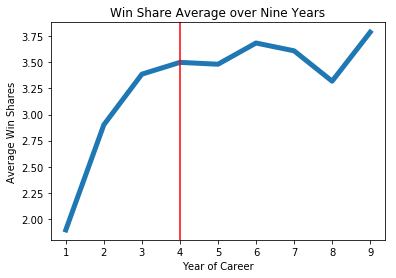

In [149]:
nine_means = [1.8954022988505732,
 2.9017751479289955,
 3.3865497076023408,
 3.499411764705883,
 3.4816091954023,
  3.6846666666666676,
  3.6101449275362305,
  3.3193798449612397,
  3.7878504672897217]
nine_years = [1,2,3,4,5,6,7,8,9]

plt.plot(nine_years, nine_means, linewidth = 5)
plt.axvline(x=4, color = "red")

plt.xlabel("Year of Career")
plt.ylabel("Average Win Shares")
plt.title("Win Share Average over Nine Years")
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9])
plt.savefig('nine_yr_avg.png')

(array([25., 29., 27., 22., 26., 13., 10.,  9.,  5.,  3.]),
 array([-0.5 ,  0.47,  1.44,  2.41,  3.38,  4.35,  5.32,  6.29,  7.26,
         8.23,  9.2 ]),
 <a list of 10 Patch objects>)

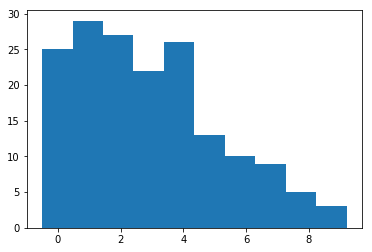

In [91]:
plt.hist(master_df[master_df['Year'] == 2]['WS'])

In [92]:
print(master_df[master_df['Year'] == 3]['WS'].mean(), master_df[master_df['Year'] == 3]['WS'].std())

3.3865497076023408 2.943086679309054


(array([42., 45., 35., 21., 15.,  5.,  4.,  1.,  2.,  1.]),
 array([-0.6 ,  1.07,  2.74,  4.41,  6.08,  7.75,  9.42, 11.09, 12.76,
        14.43, 16.1 ]),
 <a list of 10 Patch objects>)

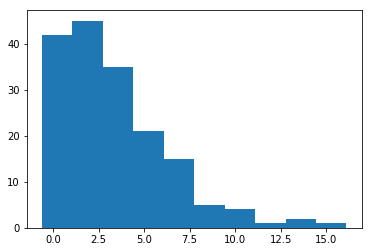

In [93]:
plt.hist(master_df[master_df['Year'] == 3]['WS'])

In [94]:
print(master_df[master_df['Year'] == 4]['WS'].mean(), master_df[master_df['Year'] == 4]['WS'].std())

3.499411764705883 2.8053308733082636


(array([30., 34., 34., 29., 16., 11.,  5.,  6.,  2.,  3.]),
 array([-0.5 ,  0.83,  2.16,  3.49,  4.82,  6.15,  7.48,  8.81, 10.14,
        11.47, 12.8 ]),
 <a list of 10 Patch objects>)

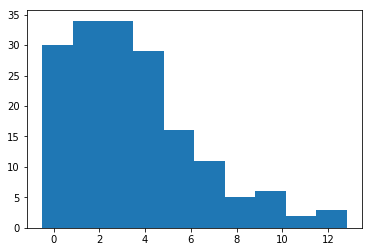

In [95]:
plt.hist(master_df[master_df['Year'] == 4]['WS'])

In [96]:
draft_url = "https://www.basketball-reference.com/play-index/draft_finder.cgi?request=1&year_min=2005&year_max=2012&college_id=0&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&order_by=ws"

In [97]:

tables_draft = pd.read_html(draft_url)
draft_position_df = tables_draft[0]
draft_position_df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Per Game,Shooting,Advanced,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0
,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2005,NBA,1,4,NOH,Chris Paul,20.058,G,us,...,4.5,9.7,2.2,0.1,.469,.504,.370,.868,171.5,.247
1,2,2007,NBA,1,2,SEA,Kevin Durant,18.276,F-G,us,...,7.1,4.1,1.1,1.1,.493,.532,.381,.883,141.7,.217
2,3,2009,NBA,1,3,OKC,James Harden,19.308,G,us,...,5.2,6.2,1.6,0.5,.443,.506,.365,.857,121.9,.224
3,4,2006,NBA,1,2,CHI,LaMarcus Aldridge,20.349,F-C,us,...,8.4,2.0,0.7,1.1,.491,.497,.283,.810,107.0,.157
4,5,2009,NBA,1,7,GSW,Stephen Curry,21.108,G,us,...,4.5,6.6,1.7,0.2,.477,.514,.436,.905,102.9,.207


In [98]:
extensions = []
for i in range(1, 5):
    extensions.append(100 * i)
for extension in extensions:
    table = pd.read_html(draft_url + "&order_by_asc=&offset=" + str(extension))
    draft_position_df = draft_position_df.append(table[0])
draft_position_df.tail()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Per Game,Shooting,Advanced,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Unnamed: 23_level_0,Unnamed: 24_level_0,Unnamed: 25_level_0
,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
81,476,2011,NBA,2,59,SAS,Ádám Hanga,22.077,G,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,477,2012,NBA,2,50,DEN,İzzet Türkyılmaz,22.045,C-F,tr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,478,2012,NBA,2,56,TOR,Tomislav Zubčić,22.178,F,hr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,479,2012,NBA,2,57,NJN,İlkan Karaman,22.052,F,tr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,480,2012,NBA,2,59,SAS,Marcus Denmon,22.106,G,us,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
draft_position_df.columns = draft_position_df.columns.droplevel(level = 0)
draft_position_df.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2005,NBA,1,4,NOH,Chris Paul,20.058,G,us,...,4.5,9.7,2.2,0.1,.469,.504,.370,.868,171.5,.247
1,2,2007,NBA,1,2,SEA,Kevin Durant,18.276,F-G,us,...,7.1,4.1,1.1,1.1,.493,.532,.381,.883,141.7,.217
2,3,2009,NBA,1,3,OKC,James Harden,19.308,G,us,...,5.2,6.2,1.6,0.5,.443,.506,.365,.857,121.9,.224
3,4,2006,NBA,1,2,CHI,LaMarcus Aldridge,20.349,F-C,us,...,8.4,2.0,0.7,1.1,.491,.497,.283,.810,107.0,.157
4,5,2009,NBA,1,7,GSW,Stephen Curry,21.108,G,us,...,4.5,6.6,1.7,0.2,.477,.514,.436,.905,102.9,.207


In [100]:
draft_position_df = draft_position_df.loc[:,'Rd' :'Player']

draft_position_df = draft_position_df.drop(columns = ['Tm'])
draft_position_df.head()

,Rd,Pk,Player
0,1,4,Chris Paul
1,1,2,Kevin Durant
2,1,3,James Harden
3,1,2,LaMarcus Aldridge
4,1,7,Stephen Curry


In [101]:
draft_position_df = draft_position_df[draft_position_df['Player'].isin(four_seasons_made_it)]
draft_position_df.head()

,Rd,Pk,Player
1,1,2,Kevin Durant
2,1,3,James Harden
3,1,2,LaMarcus Aldridge
4,1,7,Stephen Curry
5,1,4,Russell Westbrook


Two other features of interest may be draft position, which can be classified as either lottery or non-lottery, and player height.

In [102]:
height_df = pd.read_csv("all_seasons.csv")
height_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,...,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [103]:
height_df = height_df[height_df['player_name'].isin(four_seasons_made_it)]
height_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
190,190,Reggie Williams,NJN,33.0,201.00,86.000000,Georgetown,USA,1987,1,...,5.8,2.4,0.8,-12.8,0.026,0.142,0.196,0.468,0.093,1996-97
4464,4464,Paul Millsap,UTA,22.0,203.20,117.026736,Louisiana Tech,USA,2006,2,...,6.8,5.2,0.8,4.9,0.152,0.208,0.178,0.571,0.068,2006-07
4489,4489,LaMarcus Aldridge,POR,21.0,210.82,111.130040,Texas,USA,2006,1,...,9.0,5.0,0.4,-2.7,0.125,0.157,0.191,0.533,0.030,2006-07
4490,4490,Kyle Lowry,MEM,21.0,182.88,79.378600,Villanova,USA,2006,1,...,5.6,3.1,3.2,18.0,0.079,0.143,0.161,0.556,0.269,2006-07
4508,4508,Kelenna Azubuike,GSW,23.0,195.58,99.790240,Kentucky,England,Undrafted,Undrafted,...,7.1,2.3,0.7,-9.9,0.040,0.110,0.187,0.572,0.068,2006-07


In [104]:
len(height_df)

1281

In [105]:
len(four_seasons_made_it)

174

In [106]:
len(draft_position_df)

153

In [107]:
master_df = pd.merge(master_df, draft_position_df,  how='outer', left_on='Player', right_on = 'Player')
master_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,OBPM,DBPM,BPM,VORP,Year,index,winshares,log_winshares,Rd,Pk
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82.0,82.0,3239.0,...,4.9,0.2,5.1,5.8,3.0,113.0,72.6,4.284965,1,2
1,10,Kevin Durant,2010-11,22.0,OKC,NBA,12.0,78.0,78.0,3038.0,...,3.7,-0.8,2.9,3.7,4.0,113.0,72.6,4.284965,1,2
2,58,Kevin Durant,2008-09,20.0,OKC,NBA,7.9,74.0,74.0,2885.0,...,2.2,-0.5,1.8,2.8,2.0,113.0,72.6,4.284965,1,2
3,591,Kevin Durant,2007-08,19.0,SEA,NBA,2.3,80.0,80.0,2768.0,...,-0.6,-0.7,-1.4,0.4,1.0,113.0,72.6,4.284965,1,2
4,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78.0,78.0,2903.0,...,5.9,-0.2,5.8,5.7,3.0,42.0,2.1,0.741937,1,6


In [108]:
len(master_df)

696

In [109]:
master_df['Rd'].fillna(0, inplace=True)
master_df['Pk'].fillna(0, inplace=True)

In [110]:
master_df['Rd'] = master_df['Rd'].apply(lambda x: str_to_flt(x))
master_df['Pk'] = master_df['Pk'].apply(lambda x: str_to_flt(x))

In [111]:
def non_lottery(row):
    if (int(row['Rd']) == 2) | (int(row['Pk']) > 14):
        return 1
    else:
        return 0
master_df['Non_Lottery'] = master_df.apply(lambda x: non_lottery(x), axis = 1)
master_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,DBPM,BPM,VORP,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82.0,82.0,3239.0,...,0.2,5.1,5.8,3.0,113.0,72.6,4.284965,1.0,2.0,0
1,10,Kevin Durant,2010-11,22.0,OKC,NBA,12.0,78.0,78.0,3038.0,...,-0.8,2.9,3.7,4.0,113.0,72.6,4.284965,1.0,2.0,0
2,58,Kevin Durant,2008-09,20.0,OKC,NBA,7.9,74.0,74.0,2885.0,...,-0.5,1.8,2.8,2.0,113.0,72.6,4.284965,1.0,2.0,0
3,591,Kevin Durant,2007-08,19.0,SEA,NBA,2.3,80.0,80.0,2768.0,...,-0.7,-1.4,0.4,1.0,113.0,72.6,4.284965,1.0,2.0,0
4,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78.0,78.0,2903.0,...,-0.2,5.8,5.7,3.0,42.0,2.1,0.741937,1.0,6.0,0


In [112]:
def lottery(row):
    if (int(row['Rd']) == 1) & (int(row['Pk']) < 15):
        return 1
    else:
        return 0
master_df['Lottery'] = master_df.apply(lambda x: lottery(x), axis = 1)
master_df.head()


,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BPM,VORP,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery,Lottery
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82.0,82.0,3239.0,...,5.1,5.8,3.0,113.0,72.6,4.284965,1.0,2.0,0,1
1,10,Kevin Durant,2010-11,22.0,OKC,NBA,12.0,78.0,78.0,3038.0,...,2.9,3.7,4.0,113.0,72.6,4.284965,1.0,2.0,0,1
2,58,Kevin Durant,2008-09,20.0,OKC,NBA,7.9,74.0,74.0,2885.0,...,1.8,2.8,2.0,113.0,72.6,4.284965,1.0,2.0,0,1
3,591,Kevin Durant,2007-08,19.0,SEA,NBA,2.3,80.0,80.0,2768.0,...,-1.4,0.4,1.0,113.0,72.6,4.284965,1.0,2.0,0,1
4,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78.0,78.0,2903.0,...,5.8,5.7,3.0,42.0,2.1,0.741937,1.0,6.0,0,1


In [113]:
master_df.tail()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BPM,VORP,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery,Lottery
691,1454,Xavier Henry,2012-13,21.0,NOH,NBA,0.0,50.0,2.0,625.0,...,-6.6,-0.7,3.0,35.0,-0.1,-2.302585,1.0,12.0,0,1
692,1278,Byron Mullens,2011-12,22.0,CHA,NBA,0.2,65.0,25.0,1465.0,...,-5.0,-1.1,3.0,144.0,0.5,-0.693147,1.0,24.0,1,0
693,1369,Byron Mullens,2012-13,23.0,CHA,NBA,0.1,53.0,41.0,1428.0,...,-3.6,-0.6,4.0,144.0,0.5,-0.693147,1.0,24.0,1,0
694,1606,Byron Mullens,2009-10,20.0,OKC,NBA,-0.1,13.0,0.0,54.0,...,-10.5,-0.1,1.0,144.0,0.5,-0.693147,1.0,24.0,1,0
695,1662,Byron Mullens,2010-11,21.0,OKC,NBA,-0.2,13.0,0.0,85.0,...,-17.2,-0.3,2.0,144.0,0.5,-0.693147,1.0,24.0,1,0


In [114]:
master_df[(master_df['Lottery'] == 0) & (master_df['Non_Lottery'] == 0) ]

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,BPM,VORP,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery,Lottery
56,47,Luis Scola,2008-09,28.0,HOU,NBA,8.6,82.0,82.0,2488.0,...,1.4,2.1,2.0,145.0,18.8,2.933857,0.0,0.0,0,0
57,115,Luis Scola,2007-08,27.0,HOU,NBA,6.5,82.0,39.0,2024.0,...,0.4,1.3,1.0,145.0,18.8,2.933857,0.0,0.0,0,0
58,126,Luis Scola,2009-10,29.0,HOU,NBA,6.3,82.0,82.0,2671.0,...,-0.4,1.1,3.0,145.0,18.8,2.933857,0.0,0.0,0,0
59,183,Luis Scola,2010-11,30.0,HOU,NBA,5.5,74.0,74.0,2412.0,...,-0.2,1.1,4.0,145.0,18.8,2.933857,0.0,0.0,0,0
100,81,Wesley Matthews,2010-11,24.0,POR,NBA,7.2,82.0,69.0,2758.0,...,1.1,2.1,2.0,0.0,23.8,3.169686,0.0,0.0,0,0
101,230,Wesley Matthews,2011-12,25.0,POR,NBA,4.8,66.0,53.0,2228.0,...,1.3,1.9,3.0,0.0,23.8,3.169686,0.0,0.0,0,0
102,239,Wesley Matthews,2012-13,26.0,POR,NBA,4.7,69.0,69.0,2403.0,...,1.2,2.0,4.0,0.0,23.8,3.169686,0.0,0.0,0,0
103,252,Wesley Matthews,2009-10,23.0,UTA,NBA,4.6,82.0,48.0,2025.0,...,-0.2,0.9,1.0,0.0,23.8,3.169686,0.0,0.0,0,0
188,164,Jamario Moon,2007-08,27.0,TOR,NBA,5.7,78.0,75.0,2166.0,...,2.8,2.6,1.0,19.0,-0.4,-2.302585,0.0,0.0,0,0
189,218,Jamario Moon,2008-09,28.0,TOT,NBA,4.9,80.0,60.0,2068.0,...,1.6,1.9,2.0,19.0,-0.4,-2.302585,0.0,0.0,0,0


In [115]:
master_df.to_csv("nba_master_new.csv", sep=',')

In [116]:
height_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
190,190,Reggie Williams,NJN,33.0,201.00,86.000000,Georgetown,USA,1987,1,...,5.8,2.4,0.8,-12.8,0.026,0.142,0.196,0.468,0.093,1996-97
4464,4464,Paul Millsap,UTA,22.0,203.20,117.026736,Louisiana Tech,USA,2006,2,...,6.8,5.2,0.8,4.9,0.152,0.208,0.178,0.571,0.068,2006-07
4489,4489,LaMarcus Aldridge,POR,21.0,210.82,111.130040,Texas,USA,2006,1,...,9.0,5.0,0.4,-2.7,0.125,0.157,0.191,0.533,0.030,2006-07
4490,4490,Kyle Lowry,MEM,21.0,182.88,79.378600,Villanova,USA,2006,1,...,5.6,3.1,3.2,18.0,0.079,0.143,0.161,0.556,0.269,2006-07
4508,4508,Kelenna Azubuike,GSW,23.0,195.58,99.790240,Kentucky,England,Undrafted,Undrafted,...,7.1,2.3,0.7,-9.9,0.040,0.110,0.187,0.572,0.068,2006-07


In [117]:
height_df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9546,9546,Garrett Temple,SAC,31.0,198.12,88.45044,Louisiana State,USA,Undrafted,Undrafted,...,7.8,2.8,2.6,-5.1,0.022,0.101,0.142,0.545,0.146,2016-17
9549,9549,Evan Turner,POR,28.0,200.66,99.79024,Ohio State,USA,2010,1,...,9.0,3.8,3.2,-4.5,0.024,0.144,0.186,0.491,0.196,2016-17
9552,9552,Eric Gordon,HOU,28.0,193.04,97.52228,Indiana,USA,2008,1,...,16.2,2.7,2.5,6.2,0.014,0.078,0.220,0.557,0.125,2016-17
9553,9553,Eric Bledsoe,PHX,27.0,185.42,92.98636,Kentucky,USA,2010,1,...,21.1,4.8,6.3,-4.1,0.025,0.139,0.280,0.563,0.309,2016-17
9560,9560,Wilson Chandler,DEN,30.0,203.20,102.05820,DePaul,USA,2007,1,...,15.7,6.5,2.0,-1.7,0.052,0.178,0.221,0.545,0.097,2016-17


In [118]:
len(height_df)

1281

In [119]:
height_df['player_name'].nunique()

162

In [120]:
height_df = height_df.drop_duplicates(subset='player_name')

In [121]:
len(height_df)

162

In [122]:
height_df = height_df.drop(columns = height_df.columns[5:])

In [123]:
height_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height
190,190,Reggie Williams,NJN,33.0,201.00
4464,4464,Paul Millsap,UTA,22.0,203.20
4489,4489,LaMarcus Aldridge,POR,21.0,210.82
4490,4490,Kyle Lowry,MEM,21.0,182.88
4508,4508,Kelenna Azubuike,GSW,23.0,195.58


In [124]:
height_df = height_df.drop(columns = height_df.columns[2:4])
height_df.head()

,Unnamed: 0,player_name,player_height
190,190,Reggie Williams,201.00
4464,4464,Paul Millsap,203.20
4489,4489,LaMarcus Aldridge,210.82
4490,4490,Kyle Lowry,182.88
4508,4508,Kelenna Azubuike,195.58


In [125]:
height_df = height_df.drop(columns = height_df.columns[0])
height_df

,player_name,player_height
190,Reggie Williams,201.00
4464,Paul Millsap,203.20
4489,LaMarcus Aldridge,210.82
4490,Kyle Lowry,182.88
4508,Kelenna Azubuike,195.58
4535,Lou Amundson,205.74
4540,Leon Powe,203.20
4553,Thabo Sefolosha,200.66
4560,Steve Novak,208.28
4568,Solomon Jones,208.28


In [126]:
master_heights_df = pd.merge(master_df, height_df,  how='outer', left_on='Player', right_on = 'player_name')
master_heights_df.head()

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery,Lottery,player_name,player_height
0,3,Kevin Durant,2009-10,21.0,OKC,NBA,16.1,82.0,82.0,3239.0,...,3.0,113.0,72.6,4.284965,1.0,2.0,0,1,Kevin Durant,205.74
1,10,Kevin Durant,2010-11,22.0,OKC,NBA,12.0,78.0,78.0,3038.0,...,4.0,113.0,72.6,4.284965,1.0,2.0,0,1,Kevin Durant,205.74
2,58,Kevin Durant,2008-09,20.0,OKC,NBA,7.9,74.0,74.0,2885.0,...,2.0,113.0,72.6,4.284965,1.0,2.0,0,1,Kevin Durant,205.74
3,591,Kevin Durant,2007-08,19.0,SEA,NBA,2.3,80.0,80.0,2768.0,...,1.0,113.0,72.6,4.284965,1.0,2.0,0,1,Kevin Durant,205.74
4,5,Brandon Roy,2008-09,24.0,POR,NBA,13.5,78.0,78.0,2903.0,...,3.0,42.0,2.1,0.741937,1.0,6.0,0,1,Brandon Roy,198.12


In [127]:
master_heights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 0 to 695
Data columns (total 63 columns):
Rk               696 non-null object
Player           696 non-null object
Season           696 non-null object
Age              696 non-null float64
Tm               696 non-null object
Lg               696 non-null object
WS               696 non-null float64
G                696 non-null float64
GS               696 non-null float64
MP               696 non-null float64
FG               696 non-null float64
FGA              696 non-null float64
2P               696 non-null float64
2PA              696 non-null float64
3P               696 non-null float64
3PA              696 non-null float64
FT               696 non-null float64
FTA              696 non-null float64
ORB              696 non-null float64
DRB              696 non-null float64
TRB              696 non-null float64
AST              696 non-null float64
STL              696 non-null float64
BLK              696 non-n

In [128]:
master_heights_df.to_csv("nba_master_heights.csv", sep=',')

In [129]:
nulls = master_heights_df[master_heights_df['player_height'].isnull()]
nulls

,Rk,Player,Season,Age,Tm,Lg,WS,G,GS,MP,...,Year,index,winshares,log_winshares,Rd,Pk,Non_Lottery,Lottery,player_name,player_height
116,100,Nikola Peković,2012-13,27.0,MIN,NBA,6.7,62.0,62.0,1959.0,...,3.0,77.0,1.1,0.095310,2.0,31.0,1,0,NaN,NaN
117,153,Nikola Peković,2013-14,28.0,MIN,NBA,5.9,54.0,54.0,1663.0,...,4.0,77.0,1.1,0.095310,2.0,31.0,1,0,NaN,NaN
118,264,Nikola Peković,2011-12,26.0,MIN,NBA,4.5,47.0,35.0,1264.0,...,2.0,77.0,1.1,0.095310,2.0,31.0,1,0,NaN,NaN
119,1066,Nikola Peković,2010-11,25.0,MIN,NBA,0.6,65.0,11.0,887.0,...,1.0,77.0,1.1,0.095310,2.0,31.0,1,0,NaN,NaN
132,114,J.J. Redick,2009-10,25.0,ORL,NBA,6.5,82.0,9.0,1808.0,...,4.0,121.0,25.2,3.226844,1.0,11.0,0,1,NaN,NaN
133,599,J.J. Redick,2008-09,24.0,ORL,NBA,2.3,64.0,5.0,1111.0,...,3.0,121.0,25.2,3.226844,1.0,11.0,0,1,NaN,NaN
134,735,J.J. Redick,2006-07,22.0,ORL,NBA,1.7,42.0,0.0,622.0,...,1.0,121.0,25.2,3.226844,1.0,11.0,0,1,NaN,NaN
135,1110,J.J. Redick,2007-08,23.0,ORL,NBA,0.5,34.0,0.0,276.0,...,2.0,121.0,25.2,3.226844,1.0,11.0,0,1,NaN,NaN
144,121,Ersan İlyasova,2011-12,24.0,MIL,NBA,6.4,60.0,41.0,1655.0,...,6.0,95.0,20.8,3.034953,2.0,36.0,1,0,NaN,NaN
145,156,Ersan İlyasova,2009-10,22.0,MIL,NBA,5.8,81.0,31.0,1898.0,...,4.0,95.0,20.8,3.034953,2.0,36.0,1,0,NaN,NaN


In [130]:
def inches_to_cm(inches):
    return (2.54 * inches)
in_inches = [83,76, 82, 84, 75, 81, 78, 81, 74, 86, 81, 75]
heights = []
for height in in_inches:
    heights.append(inches_to_cm(height))
heights

[210.82,
 193.04,
 208.28,
 213.36,
 190.5,
 205.74,
 198.12,
 205.74,
 187.96,
 218.44,
 205.74,
 190.5]

In [131]:
names = ["Nikola Pekovic", "J.J. Redick","Ersan Ilyasova", "Omer Asik", "Goran Dragic", "J.J. Hickson", "Greivis Vásquez", "Kevin Seraphin", "A.J. Price", "Alexis Ajinça", "D.J. White", "Sergio Rodriguez" ]
small_df = pd.DataFrame(list(zip(names, heights)), columns = ["Player", "Height"])
small_df

,Player,Height
0,Nikola Pekovic,210.82
1,J.J. Redick,193.04
2,Ersan Ilyasova,208.28
3,Omer Asik,213.36
4,Goran Dragic,190.50
5,J.J. Hickson,205.74
6,Greivis Vásquez,198.12
7,Kevin Seraphin,205.74
8,A.J. Price,187.96
9,Alexis Ajinça,218.44


In [132]:
small_df.to_csv("small_df_heights.csv", sep=',')

In [133]:
small_df

,Player,Height
0,Nikola Pekovic,210.82
1,J.J. Redick,193.04
2,Ersan Ilyasova,208.28
3,Omer Asik,213.36
4,Goran Dragic,190.50
5,J.J. Hickson,205.74
6,Greivis Vásquez,198.12
7,Kevin Seraphin,205.74
8,A.J. Price,187.96
9,Alexis Ajinça,218.44


In [134]:
height_df = height_df.append(small_df)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [135]:
len(height_df)

174

In [136]:
height_df["Height"] = height_df['player_height']
height_df["Player"] = height_df['player_name']
height_df.head()
height_df = height_df.drop(columns = height_df.columns[3:])
height_df.head()

,Height,Player,player_height
190,201.00,Reggie Williams,201.00
4464,203.20,Paul Millsap,203.20
4489,210.82,LaMarcus Aldridge,210.82
4490,182.88,Kyle Lowry,182.88
4508,195.58,Kelenna Azubuike,195.58


In [137]:
master_df =master_df.drop(columns = ['player_height'], axis = 1)
master_df.head()

KeyError: "['player_height'] not found in axis"

In [ ]:
master_df.head()

In [ ]:
master_df['Player'] = master_df['Player_x']
master_df.drop(columns = "Player_x")
master_df.head()

In [ ]:

master_df = master_df.drop(columns = "player_height")
master_df = master_df.drop(columns = "Player_y")
master_df = master_df.drop(columns = "Height")

master_df.head()




In [ ]:
master_df = pd.merge(master_df, height_df, how = "outer", left_on ='Player', right_on ='Player')

In [ ]:
master_df = master_df.drop(columns = "player_height_x")
master_df = master_df.drop(columns = "player_height_y")
master_df = master_df.drop(columns = "Height")

In [ ]:
master_df = pd.merge(master_df, height_df, how = "outer", left_on ='Player', right_on ='Player')

In [ ]:
master_df.info()

In [ ]:
master_df["Player"].nunique()

In [ ]:
master_df["Player"].unique()